# Data Preparation - LMA Features Data

### Note: Datasets follow the format preprocess_datasetname
So we have, for example: Fs_B_dataset1.csv -> Dataset was first Feature Selected and then Balanced

Fs - Feature Selected

B - Balanced

N - Normalized

S - Standardized

## Imports

In [1]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import joblib
from collections import Counter
import numpy as np

### Load Dataset

In [21]:
data = pd.read_csv('datasets/DANCE_WALK_KIN_1sec.csv')

In [22]:
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z,EMOTION_P,EMOTION_A,EMOTION_D
0,0.483402,0.266753,0.231481,0.485866,0.468827,0.452886,0.350871,0.334321,0.286151,0.278749,...,0.416963,0.045123,-0.111529,0.339270,-0.321348,0.017921,0.477275,-0.5,0.6,0.9
1,0.500120,0.328175,0.311643,0.453223,0.436114,0.440360,0.333428,0.333333,0.286151,0.278734,...,-1.070198,0.091503,0.213905,-0.799065,0.938129,-0.060268,-1.054568,-0.5,0.6,0.9
2,0.672433,0.458851,0.484472,0.494846,0.455937,0.417182,0.356992,0.318336,0.286151,0.278509,...,1.026125,-0.476917,-0.098753,0.748896,-0.981100,0.024249,0.724705,-0.5,0.6,0.9
3,0.821350,0.331003,0.345881,0.499998,0.492491,0.473935,0.378241,0.357670,0.286151,0.278548,...,-0.827843,0.388929,0.068525,-0.848111,0.347235,0.142775,-0.434821,-0.5,0.6,0.9
4,1.067582,0.267370,0.567160,0.513692,0.462154,0.571669,0.352222,0.453857,0.286151,0.278663,...,0.864266,0.038455,-0.172785,1.058543,0.106772,-0.248048,0.542876,-0.5,0.6,0.9


## Feature Selection

In [23]:
data = pd.read_csv('datasets/DANCE_WALK_KIN_1sec.csv')

In [24]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_hand_movement_jerk_z,l_foot_movement_jerk_x,l_foot_movement_jerk_y,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z
0,0.483402,0.266753,0.231481,0.485866,0.468827,0.452886,0.350871,0.334321,0.286151,0.278749,...,0.412834,-0.236966,0.025232,0.416963,0.045123,-0.111529,0.339270,-0.321348,0.017921,0.477275
1,0.500120,0.328175,0.311643,0.453223,0.436114,0.440360,0.333428,0.333333,0.286151,0.278734,...,-0.746152,0.855170,-0.047505,-1.070198,0.091503,0.213905,-0.799065,0.938129,-0.060268,-1.054568
2,0.672433,0.458851,0.484472,0.494846,0.455937,0.417182,0.356992,0.318336,0.286151,0.278509,...,-0.257443,-1.133321,-0.021837,1.026125,-0.476917,-0.098753,0.748896,-0.981100,0.024249,0.724705
3,0.821350,0.331003,0.345881,0.499998,0.492491,0.473935,0.378241,0.357670,0.286151,0.278548,...,1.126059,0.633565,0.146613,-0.827843,0.388929,0.068525,-0.848111,0.347235,0.142775,-0.434821
4,1.067582,0.267370,0.567160,0.513692,0.462154,0.571669,0.352222,0.453857,0.286151,0.278663,...,-0.146206,-0.168159,-0.216873,0.864266,0.038455,-0.172785,1.058543,0.106772,-0.248048,0.542876


### Variance Analysis

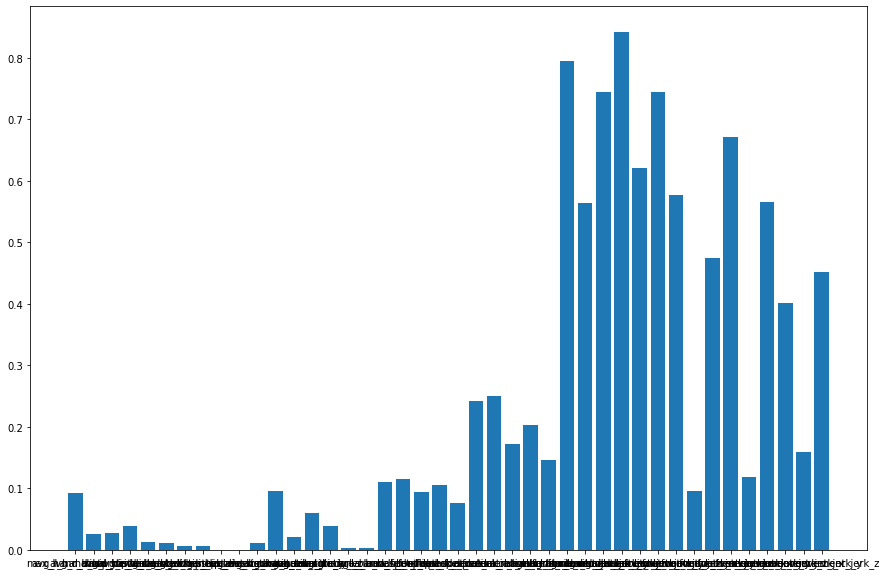

max_hand_distance  -  0.09166625031969326
avg_l_hand_hip_distance  -  0.025547869686916757
avg_r_hand_hip_distance  -  0.02731946552084746
max_stride_length  -  0.039513143272336494
avg_l_hand_chest_distance  -  0.012243881523194654
avg_r_hand_chest_distance  -  0.011917063752859797
avg_l_elbow_hip_distance  -  0.006132856651219529
avg_r_elbow_hip_distance  -  0.006002265120017792
avg_chest_pelvis_distance  -  3.347900308471026e-19
avg_neck_chest_distance  -  1.2845910446202134e-05
avg_neck_rotation_w  -  0.010751261605361856
avg_neck_rotation_x  -  0.09544423174142075
avg_neck_rotation_y  -  0.02020881227423806
avg_neck_rotation_z  -  0.05978589222419838
avg_total_body_volume  -  0.03856154172962465
avg_triangle_area_hands_neck  -  0.0032877689163072375
avg_triangle_area_feet_hips  -  0.003235660040245255
l_hand_speed  -  0.11026768159368149
r_hand_speed  -  0.1148060046504557
l_foot_speed  -  0.09342749185061554
r_foot_speed  -  0.10624328747717603
neck_speed  -  0.07688396841485219


In [25]:
x_fs = []
y_fs = []
for i in data.columns:
    x_fs.append(data[i].var())
    y_fs.append(i)


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(y_fs, x_fs)

plt.show()

for i in data.columns:
    print(i, " - ", data[i].var())

### Remove highly correlated features

In [26]:
data = pd.read_csv('datasets/DANCE_WALK_KIN_1sec.csv')

In [27]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_hand_movement_jerk_z,l_foot_movement_jerk_x,l_foot_movement_jerk_y,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z
0,0.483402,0.266753,0.231481,0.485866,0.468827,0.452886,0.350871,0.334321,0.286151,0.278749,...,0.412834,-0.236966,0.025232,0.416963,0.045123,-0.111529,0.339270,-0.321348,0.017921,0.477275
1,0.500120,0.328175,0.311643,0.453223,0.436114,0.440360,0.333428,0.333333,0.286151,0.278734,...,-0.746152,0.855170,-0.047505,-1.070198,0.091503,0.213905,-0.799065,0.938129,-0.060268,-1.054568
2,0.672433,0.458851,0.484472,0.494846,0.455937,0.417182,0.356992,0.318336,0.286151,0.278509,...,-0.257443,-1.133321,-0.021837,1.026125,-0.476917,-0.098753,0.748896,-0.981100,0.024249,0.724705
3,0.821350,0.331003,0.345881,0.499998,0.492491,0.473935,0.378241,0.357670,0.286151,0.278548,...,1.126059,0.633565,0.146613,-0.827843,0.388929,0.068525,-0.848111,0.347235,0.142775,-0.434821
4,1.067582,0.267370,0.567160,0.513692,0.462154,0.571669,0.352222,0.453857,0.286151,0.278663,...,-0.146206,-0.168159,-0.216873,0.864266,0.038455,-0.172785,1.058543,0.106772,-0.248048,0.542876


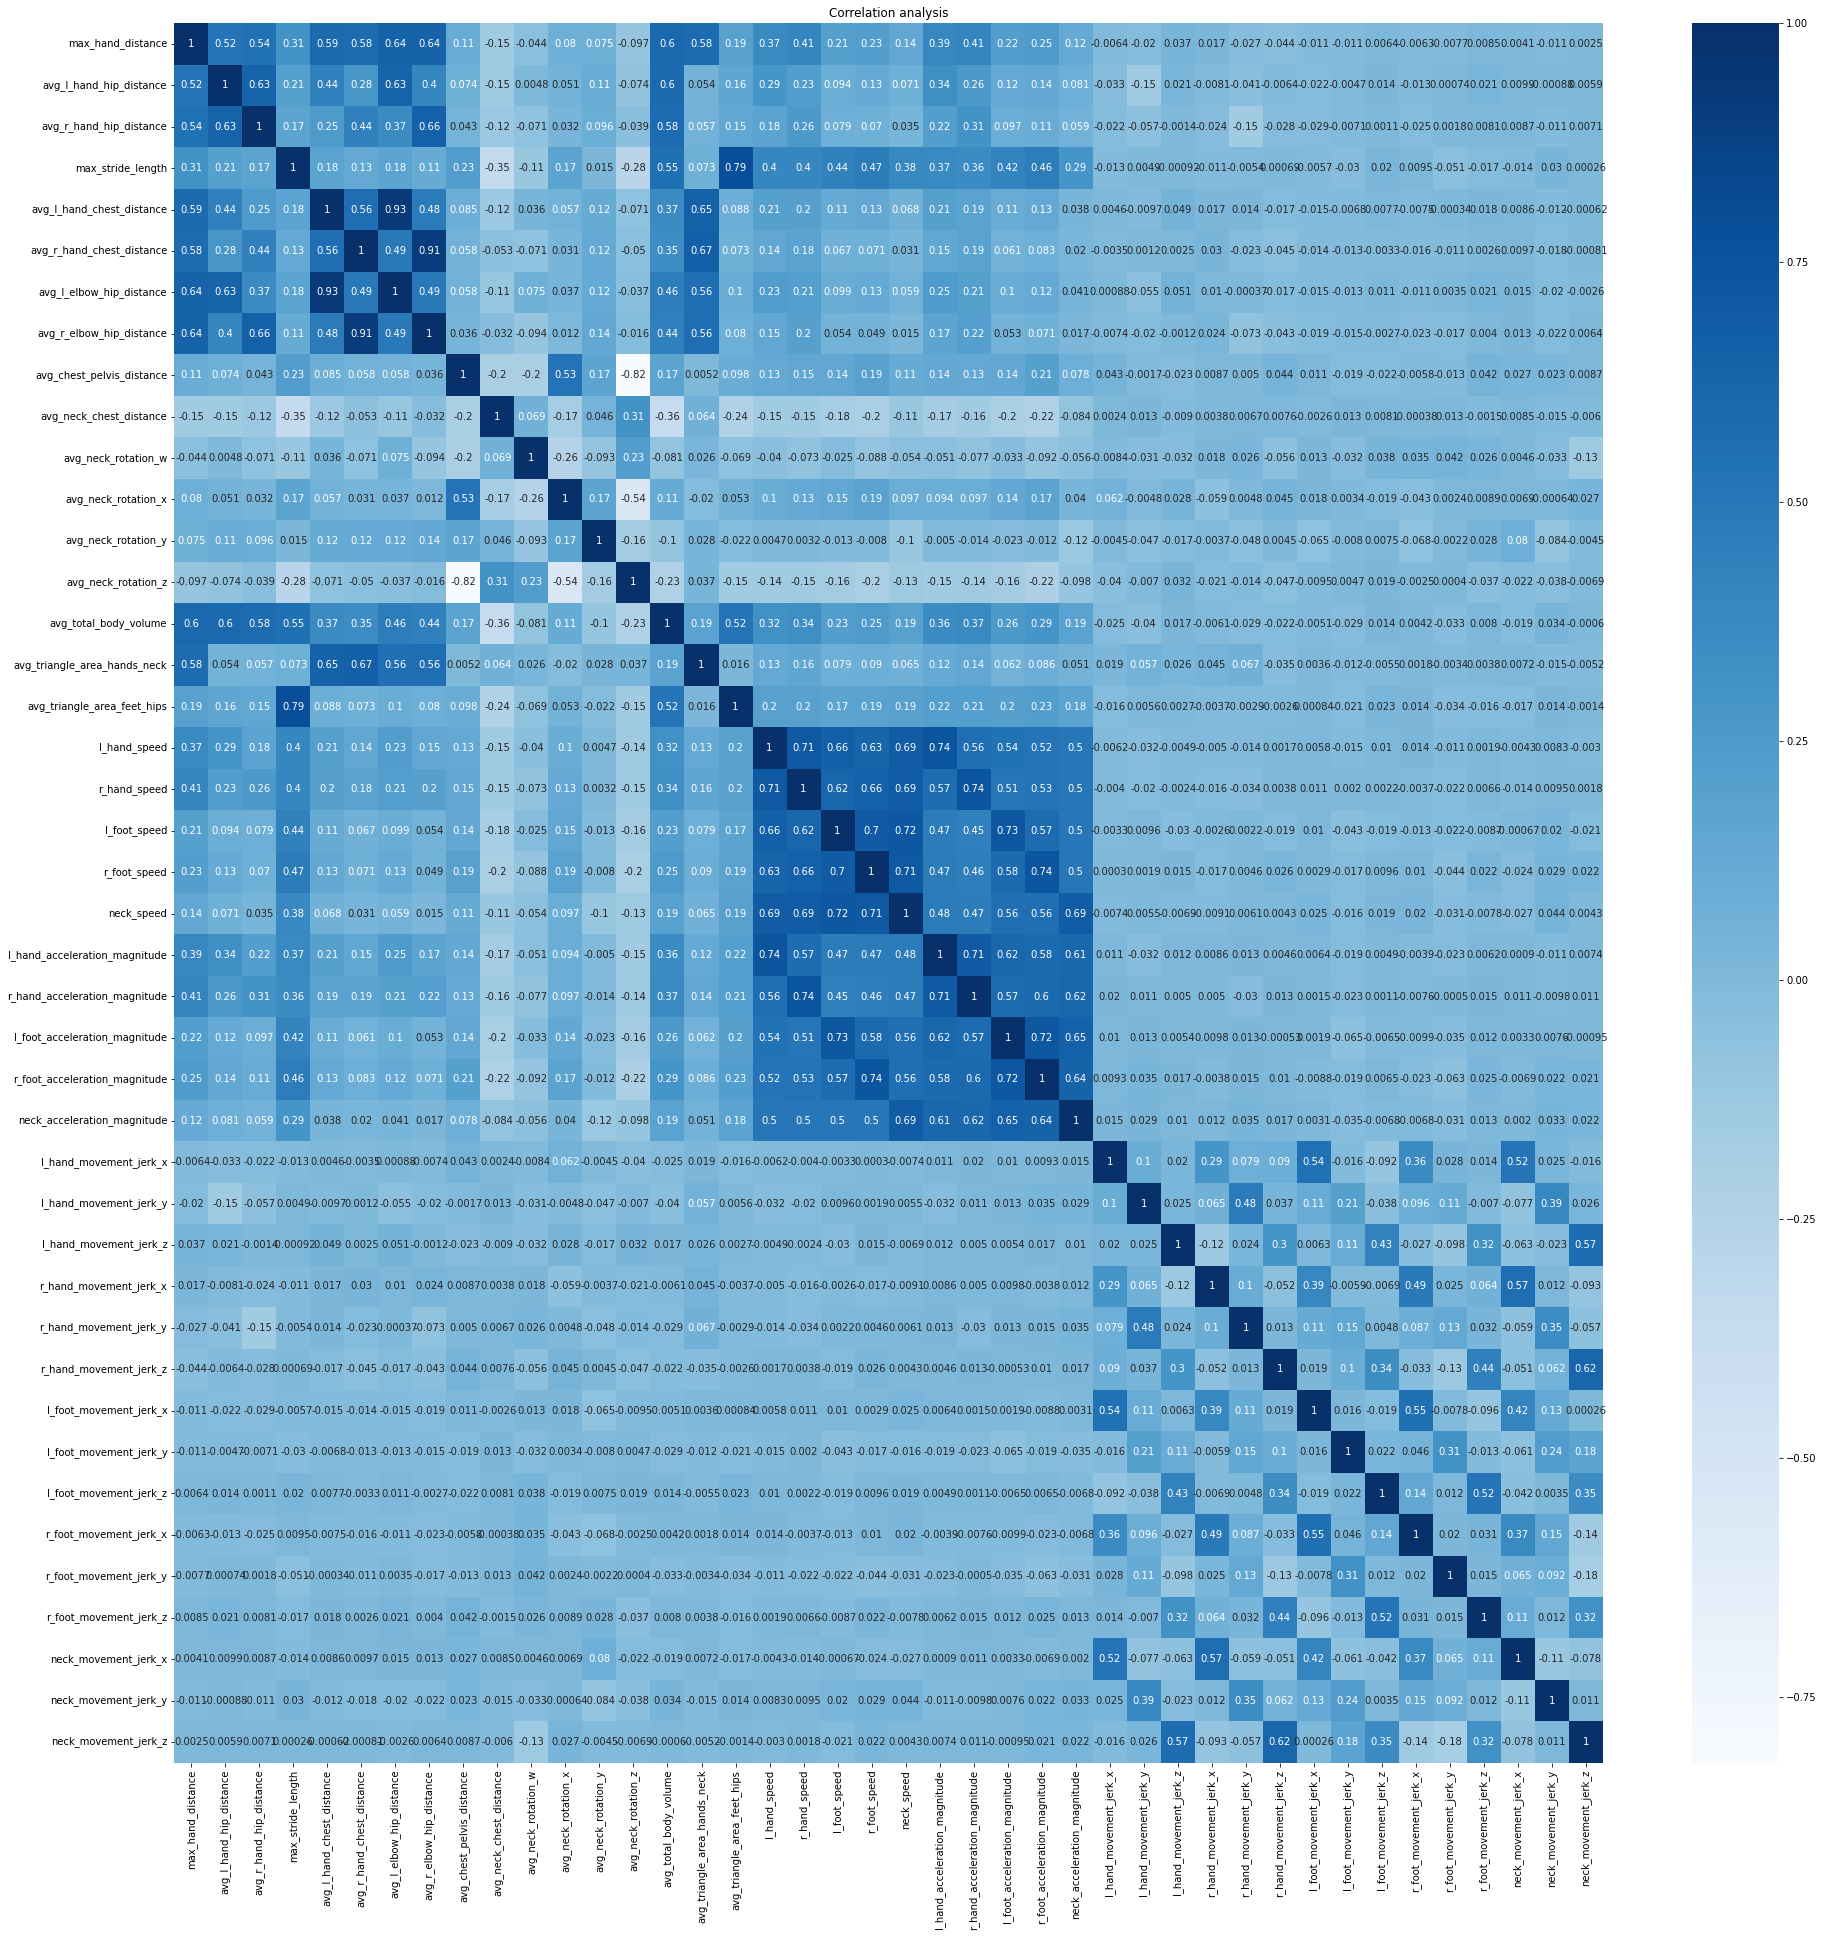

In [28]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [29]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

[]


In [30]:
df = pd.read_csv('datasets/DANCE_WALK_KIN_1sec.csv')

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION_P"])
print("===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_A"])
print("\n===CORRELATION BETWEEN VAR AND AROUSAL COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_D"])
print("\n===CORRELATION BETWEEN VAR AND DOMINANCE COORDINATE===")
print(cor_target)

===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===
max_hand_distance                0.324248
avg_l_hand_hip_distance          0.275666
avg_r_hand_hip_distance          0.231924
max_stride_length                0.264138
avg_l_hand_chest_distance        0.212465
avg_r_hand_chest_distance        0.167063
avg_l_elbow_hip_distance         0.224045
avg_r_elbow_hip_distance         0.172903
avg_chest_pelvis_distance        0.157582
avg_neck_chest_distance          0.160700
avg_neck_rotation_w              0.050646
avg_neck_rotation_x              0.087640
avg_neck_rotation_y              0.103704
avg_neck_rotation_z              0.175352
avg_total_body_volume            0.287122
avg_triangle_area_hands_neck     0.075926
avg_triangle_area_feet_hips      0.125886
l_hand_speed                     0.268198
r_hand_speed                     0.258517
l_foot_speed                     0.193980
r_foot_speed                     0.211540
neck_speed                       0.112984
l_hand_acceleration_ma

In [31]:
X = X.drop(columns=[
    "l_hand_movement_jerk_x", "l_hand_movement_jerk_y", "l_hand_movement_jerk_z",
    "r_hand_movement_jerk_x", "r_hand_movement_jerk_y", "r_hand_movement_jerk_z",
    "l_foot_movement_jerk_x", "l_foot_movement_jerk_y", "l_foot_movement_jerk_z",
    "r_foot_movement_jerk_x", "r_foot_movement_jerk_y", "r_foot_movement_jerk_z",
    "neck_movement_jerk_x", "neck_movement_jerk_y", "neck_movement_jerk_z",
])

In [32]:
#Store

fullData = X.join(y, how='right')
fullData.to_csv(r'datasets/Fs_DANCE_WALK_KIN_1sec.csv', index = False)

In [33]:
data = pd.read_csv('datasets/Fs_DANCE_WALK_KIN_1sec.csv')

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,0.483402,0.266753,0.231481,0.485866,0.468827,0.452886,0.350871,0.334321,0.286151,0.278749,...,0.359971,0.575654,0.483178,0.435628,0.480258,0.359971,0.575654,-0.5,0.6,0.9
1,0.500120,0.328175,0.311643,0.453223,0.436114,0.440360,0.333428,0.333333,0.286151,0.278734,...,0.218273,0.312859,0.995506,0.840211,0.899660,0.490468,0.845860,-0.5,0.6,0.9
2,0.672433,0.458851,0.484472,0.494846,0.455937,0.417182,0.356992,0.318336,0.286151,0.278509,...,0.231481,0.093807,1.559399,0.945012,0.637447,0.446531,0.393429,-0.5,0.6,0.9
3,0.821350,0.331003,0.345881,0.499998,0.492491,0.473935,0.378241,0.357670,0.286151,0.278548,...,0.411042,0.267856,1.488180,0.784444,0.481164,0.565742,0.313752,-0.5,0.6,0.9
4,1.067582,0.267370,0.567160,0.513692,0.462154,0.571669,0.352222,0.453857,0.286151,0.278663,...,0.116532,0.044175,0.761068,0.829884,0.427888,0.516958,0.297537,-0.5,0.6,0.9


In [34]:
df = data

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION_P"])
print("===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_A"])
print("\n===CORRELATION BETWEEN VAR AND AROUSAL COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_D"])
print("\n===CORRELATION BETWEEN VAR AND DOMINANCE COORDINATE===")
print(cor_target)

===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===
max_hand_distance                0.324248
avg_l_hand_hip_distance          0.275666
avg_r_hand_hip_distance          0.231924
max_stride_length                0.264138
avg_l_hand_chest_distance        0.212465
avg_r_hand_chest_distance        0.167063
avg_l_elbow_hip_distance         0.224045
avg_r_elbow_hip_distance         0.172903
avg_chest_pelvis_distance        0.157582
avg_neck_chest_distance          0.160700
avg_neck_rotation_w              0.050646
avg_neck_rotation_x              0.087640
avg_neck_rotation_y              0.103704
avg_neck_rotation_z              0.175352
avg_total_body_volume            0.287122
avg_triangle_area_hands_neck     0.075926
avg_triangle_area_feet_hips      0.125886
l_hand_speed                     0.268198
r_hand_speed                     0.258517
l_foot_speed                     0.193980
r_foot_speed                     0.211540
neck_speed                       0.112984
l_hand_acceleration_ma

## Data Balancing

In [125]:
data = pd.read_csv('datasets/labels/DANCE_WALK_KIN_1sec.csv')
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_foot_movement_jerk_x,l_foot_movement_jerk_y,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z,EMOTION
0,0.483402,0.266753,0.231481,0.485866,0.468827,0.452886,0.350871,0.334321,0.286151,0.278749,...,-0.236966,0.025232,0.416963,0.045123,-0.111529,0.339270,-0.321348,0.017921,0.477275,angry
1,0.500120,0.328175,0.311643,0.453223,0.436114,0.440360,0.333428,0.333333,0.286151,0.278734,...,0.855170,-0.047505,-1.070198,0.091503,0.213905,-0.799065,0.938129,-0.060268,-1.054568,angry
2,0.672433,0.458851,0.484472,0.494846,0.455937,0.417182,0.356992,0.318336,0.286151,0.278509,...,-1.133321,-0.021837,1.026125,-0.476917,-0.098753,0.748896,-0.981100,0.024249,0.724705,angry
3,0.821350,0.331003,0.345881,0.499998,0.492491,0.473935,0.378241,0.357670,0.286151,0.278548,...,0.633565,0.146613,-0.827843,0.388929,0.068525,-0.848111,0.347235,0.142775,-0.434821,angry
4,1.067582,0.267370,0.567160,0.513692,0.462154,0.571669,0.352222,0.453857,0.286151,0.278663,...,-0.168159,-0.216873,0.864266,0.038455,-0.172785,1.058543,0.106772,-0.248048,0.542876,angry


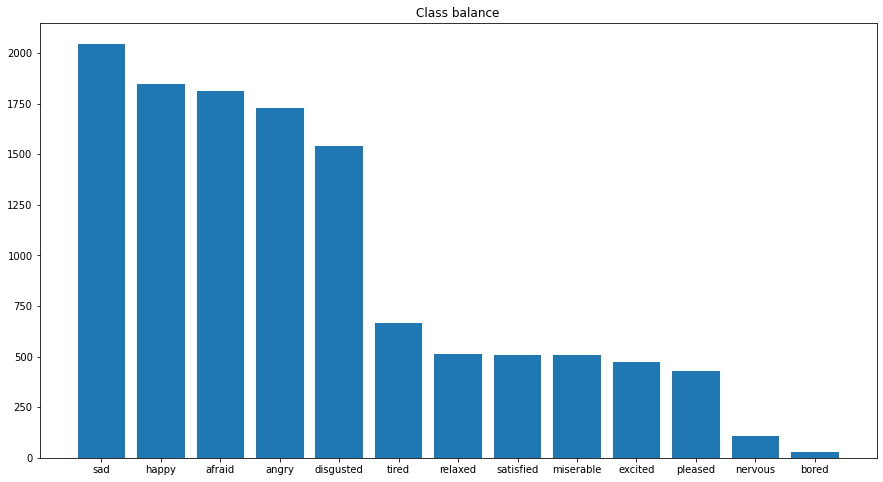

Minority class: 28
Majority class: 1814
Proportion: 0.02 : 1.0


In [126]:
target_count = data['EMOTION'].value_counts()

plt.figure(figsize=(15,8))
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

Class=angry, n=1727 (14.141%)
Class=happy, n=1849 (15.140%)
Class=sad, n=2046 (16.753%)
Class=disgusted, n=1539 (12.601%)
Class=afraid, n=1814 (14.853%)
Class=excited, n=474 (3.881%)
Class=tired, n=667 (5.461%)
Class=pleased, n=428 (3.504%)
Class=satisfied, n=509 (4.168%)
Class=bored, n=28 (0.229%)
Class=relaxed, n=513 (4.200%)
Class=miserable, n=509 (4.168%)
Class=nervous, n=110 (0.901%)


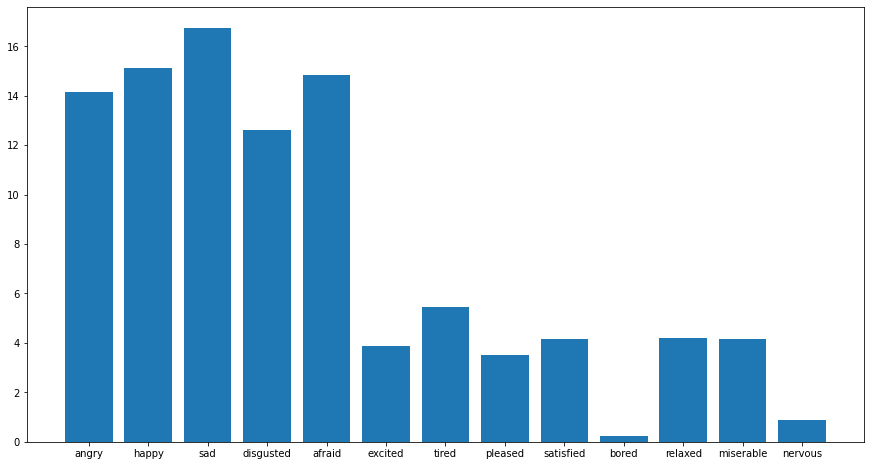

In [127]:
data = pd.read_csv('datasets/labels/DANCE_WALK_KIN_1sec.csv')


values = data.values
# split into input and output elements
X, y = values[:, :-1], values[:, -1]

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(15,8))
plt.bar(counter.keys(), perc)
plt.show()

### Undersample

Class=afraid, n=1000 (8.188%)
Class=angry, n=1000 (8.188%)
Class=bored, n=28 (0.229%)
Class=disgusted, n=1000 (8.188%)
Class=excited, n=474 (3.881%)
Class=happy, n=1000 (8.188%)
Class=miserable, n=509 (4.168%)
Class=nervous, n=110 (0.901%)
Class=pleased, n=428 (3.504%)
Class=relaxed, n=513 (4.200%)
Class=sad, n=1000 (8.188%)
Class=satisfied, n=509 (4.168%)
Class=tired, n=667 (5.461%)


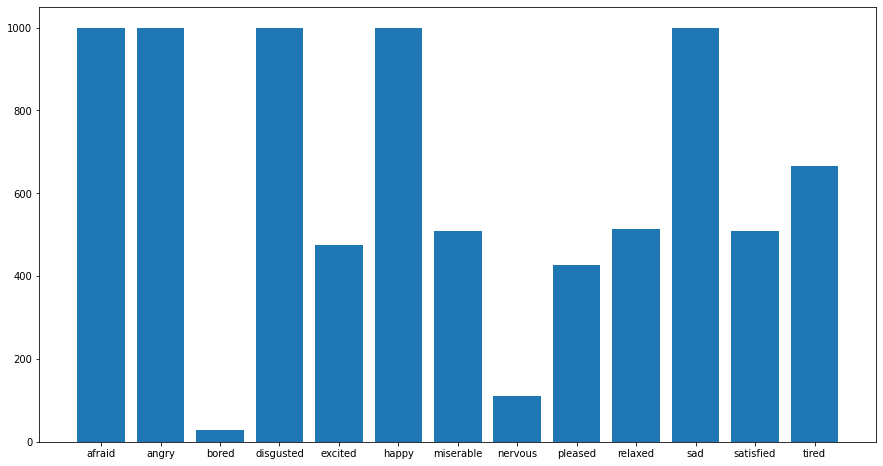

In [128]:
#strategy = {"angry":339, "happy": 400, "sad": 338, "afraid": 385, "pleased": 400, "bored": 28, "tired": 400, "relaxed": 400, "excited": 400, "miserable": 400, "satisfied": 400, "nervous": 110}
strategy = {"angry":1000,"disgusted":1000, "happy": 1000, "sad": 1000, "afraid": 1000, "pleased": 428, "bored": 28, "tired": 667, "relaxed": 513, "excited": 474, "miserable": 509, "satisfied": 509, "nervous": 110}


nm = NearMiss(sampling_strategy=strategy)
X_res, y_res = nm.fit_resample(X, y)

# summarize distribution
counter = Counter(y_res)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(15,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### SMOTE

Class=afraid, n=600 (7.692%)
Class=angry, n=600 (7.692%)
Class=bored, n=600 (7.692%)
Class=disgusted, n=600 (7.692%)
Class=excited, n=600 (7.692%)
Class=happy, n=600 (7.692%)
Class=miserable, n=600 (7.692%)
Class=nervous, n=600 (7.692%)
Class=pleased, n=600 (7.692%)
Class=relaxed, n=600 (7.692%)
Class=sad, n=600 (7.692%)
Class=satisfied, n=600 (7.692%)
Class=tired, n=600 (7.692%)


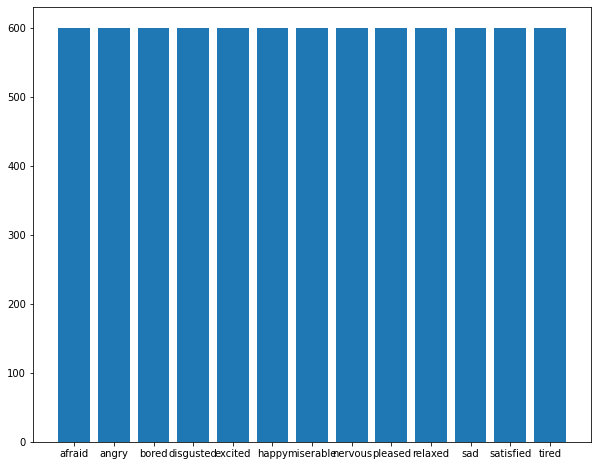

In [111]:
#strategy = {"angry":400, "happy": 400, "sad": 400, "afraid": 400, "pleased": 400, "bored": 400, "tired": 400, "relaxed": 400, "excited": 400, "miserable": 400, "satisfied": 400, "nervous": 400}
strategy = {"angry":600, "happy": 600, "sad": 600, "afraid": 600, "pleased": 600, "bored": 600, "tired": 600, "relaxed": 600, "excited": 600, "miserable": 600, "satisfied": 600, "nervous": 600, "disgusted": 600}


# transform the dataset
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X_res, y_res)

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### Store data

In [129]:
conv_dict = {
    "angry": (-0.5, 0.6, 0.9),
    "happy": (0.6, 0.5, 0.2),
    "sad": (-0.6, -0.3, -0.3),
    "disgusted": (-0.4, 0.25, -0.1) ,
    "afraid": (-0.35, 0.7, -0.8),
    "pleased": (0.7, 0.2, 0.2),
    "bored": (-0.5, -0.7, -0.25),
    "tired": (0.1, -0.7, -0.2),
    "relaxed": (0.6, -0.55, 0.1),
    "excited": (0.5, 0.7, 0.4),
    "miserable": (-0.85, -0.1, -0.8),
    "nervous": (-0.3, -0.66, -0.7),
    "satisfied": (0.9, -0.25, 0.65),   
}

In [132]:
header = ["max_hand_distance",
          "avg_l_hand_hip_distance",
          "avg_r_hand_hip_distance",
          "max_stride_length",
          "avg_l_hand_chest_distance",
          "avg_r_hand_chest_distance",
          "avg_l_elbow_hip_distance",
          "avg_r_elbow_hip_distance",
          "avg_chest_pelvis_distance",
          "avg_neck_chest_distance",
          "avg_neck_rotation_w", "avg_neck_rotation_x", "avg_neck_rotation_y", "avg_neck_rotation_z",
          "avg_total_body_volume",
          "avg_triangle_area_hands_neck",
          "avg_triangle_area_feet_hips",
          
          "l_hand_speed",
          "r_hand_speed",
          "l_foot_speed",
          "r_foot_speed",
          "neck_speed",
          
          "l_hand_acceleration_magnitude",
          "r_hand_acceleration_magnitude",
          "l_foot_acceleration_magnitude",
          "r_foot_acceleration_magnitude",
          "neck_acceleration_magnitude",
          
          #"l_hand_movement_jerk_x", "l_hand_movement_jerk_y", "l_hand_movement_jerk_z",
          #"r_hand_movement_jerk_x", "r_hand_movement_jerk_y", "r_hand_movement_jerk_z",
          #"l_foot_movement_jerk_x", "l_foot_movement_jerk_y", "l_foot_movement_jerk_z",
          #"r_foot_movement_jerk_x", "r_foot_movement_jerk_y", "r_foot_movement_jerk_z",
          #"neck_movement_jerk_x", "neck_movement_jerk_y", "neck_movement_jerk_z",
          
          "EMOTION_P", "EMOTION_A", "EMOTION_D"
         ]

forbidden_index = [27,28,29,30, 31,32,33,34, 35,36,37,38, 39,40,41,42]

with open('datasets/Fs_B2_DANCE_WALK_KIN_1sec.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)

    for i in range(0,len(y)):
        new_row = []
        for j in range(0,len(X[i])):
            if(j in forbidden_index):
                continue
            new_row.append(X[i][j])
                
        emotion = y[i]
        if emotion == "scared":
            emotion = "afraid"
        elif(emotion == "neutral" or emotion == "bored"):
            continue
                
        coordinates = conv_dict[emotion]
        new_row.append(coordinates[0])
        new_row.append(coordinates[1])
        new_row.append(coordinates[2])

        writer.writerow(new_row)

In [133]:
data = pd.read_csv('datasets/Fs_B2_DANCE_WALK_KIN_1sec.csv')

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,0.483402,0.266753,0.231481,0.485866,0.468827,0.452886,0.350871,0.334321,0.286151,0.278749,...,0.359971,0.575654,0.483178,0.435628,0.480258,0.359971,0.575654,-0.5,0.6,0.9
1,0.500120,0.328175,0.311643,0.453223,0.436114,0.440360,0.333428,0.333333,0.286151,0.278734,...,0.218273,0.312859,0.995506,0.840211,0.899660,0.490468,0.845860,-0.5,0.6,0.9
2,0.672433,0.458851,0.484472,0.494846,0.455937,0.417182,0.356992,0.318336,0.286151,0.278509,...,0.231481,0.093807,1.559399,0.945012,0.637447,0.446531,0.393429,-0.5,0.6,0.9
3,0.821350,0.331003,0.345881,0.499998,0.492491,0.473935,0.378241,0.357670,0.286151,0.278548,...,0.411042,0.267856,1.488180,0.784444,0.481164,0.565742,0.313752,-0.5,0.6,0.9
4,1.067582,0.267370,0.567160,0.513692,0.462154,0.571669,0.352222,0.453857,0.286151,0.278663,...,0.116532,0.044175,0.761068,0.829884,0.427888,0.516958,0.297537,-0.5,0.6,0.9


## Data Normalization

In [58]:
data = pd.read_csv('datasets/Fs_DANCE_WALK_KIN_1sec.csv')

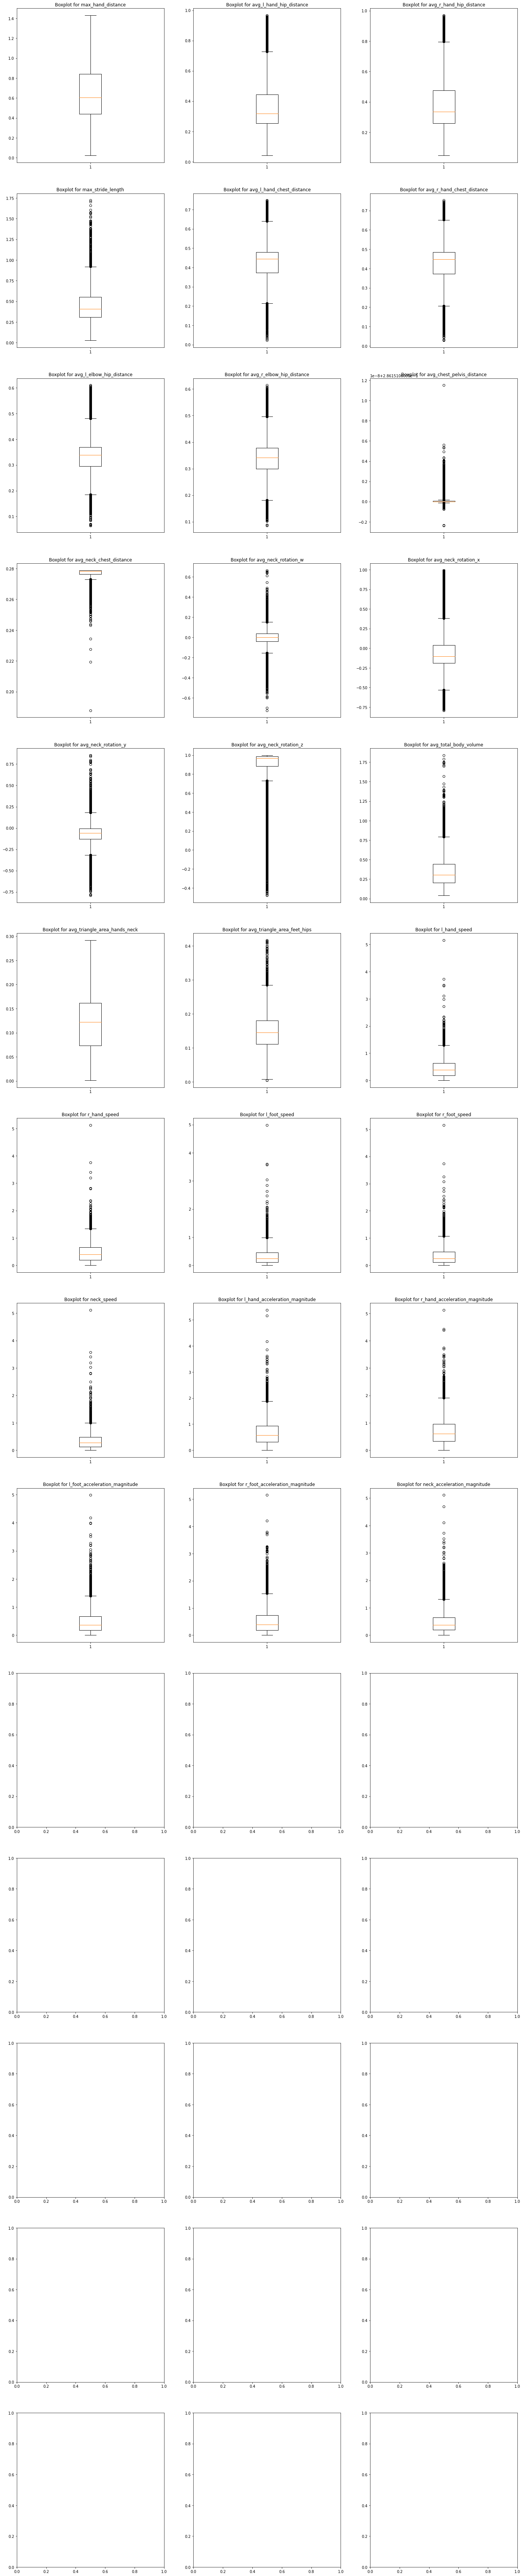

In [59]:
target = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)

numeric_vars = data.columns

rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    
    i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
    
plt.show()

In [60]:
numeric_data = data

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
count,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,...,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000
mean,0.450770,0.351213,0.361734,0.247063,0.556490,0.552401,0.500947,0.487138,0.183829,0.977732,...,0.086166,0.090477,0.065474,0.067501,0.065691,0.126344,0.136926,0.096654,0.100364,0.091487
std,0.215258,0.172657,0.179097,0.117264,0.152431,0.150649,0.143788,0.146765,0.041716,0.039362,...,0.064359,0.066187,0.061348,0.063322,0.054241,0.091507,0.097719,0.083074,0.087442,0.074952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.297750,0.229873,0.230560,0.166633,0.484589,0.476444,0.423100,0.404223,0.169134,0.973437,...,0.035809,0.038581,0.020803,0.020964,0.024499,0.058334,0.063897,0.035947,0.036538,0.037864
50%,0.414458,0.299002,0.311418,0.224696,0.583605,0.578452,0.502790,0.485332,0.170457,0.994708,...,0.074018,0.078877,0.047223,0.047579,0.053666,0.107020,0.117877,0.074062,0.076301,0.074292
75%,0.581451,0.434942,0.463357,0.311005,0.631440,0.630229,0.558954,0.553421,0.174326,0.998673,...,0.122100,0.127953,0.091225,0.095898,0.093151,0.174710,0.187901,0.133811,0.141295,0.125391
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


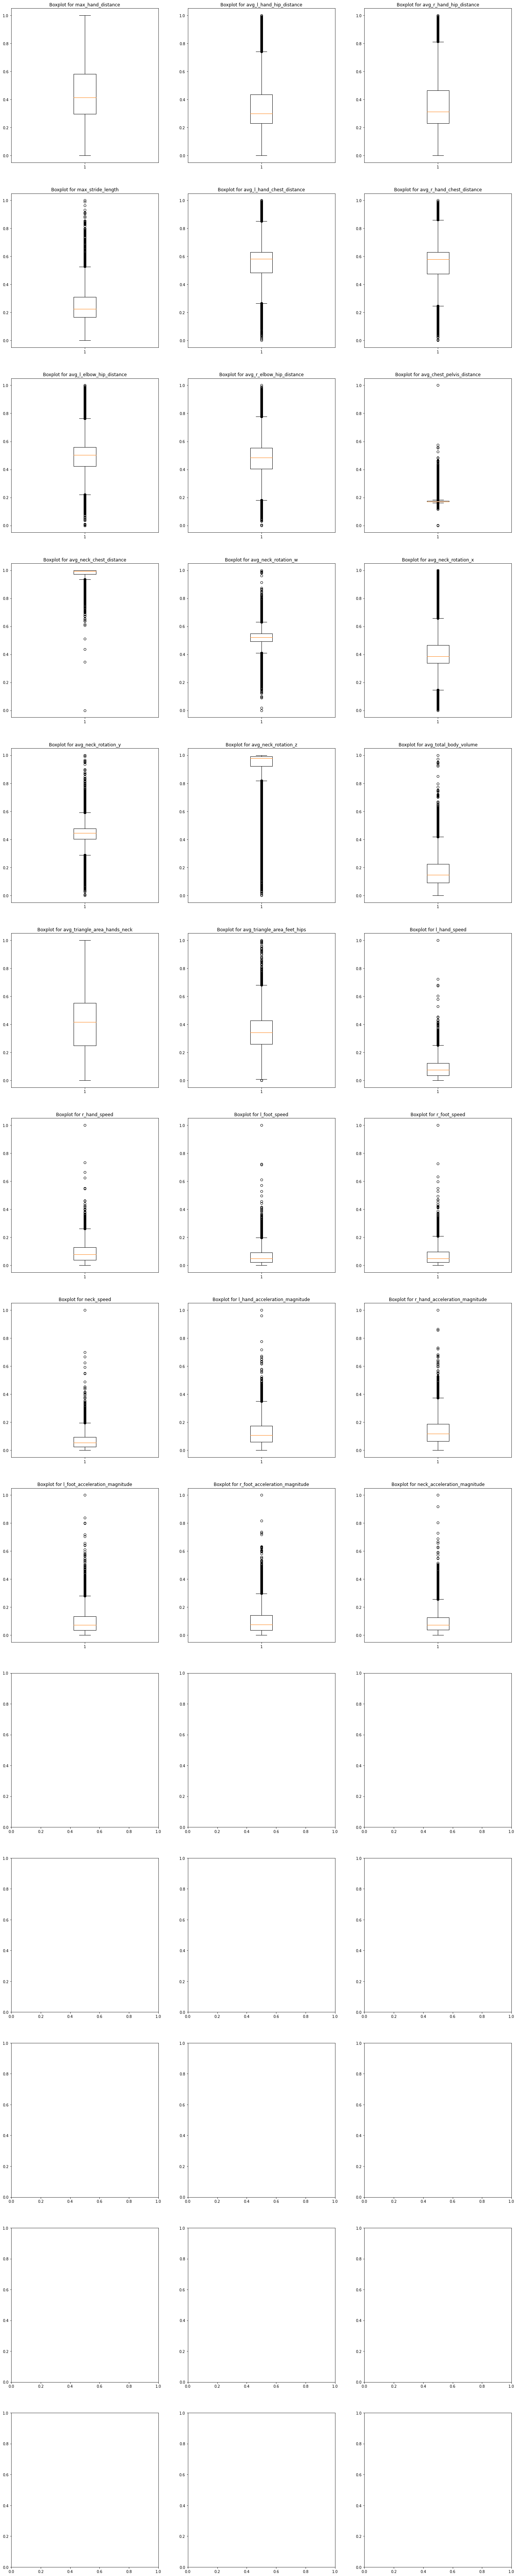

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,0.327745,0.244126,0.200626,0.271140,0.616132,0.586245,0.524938,0.470205,0.169207,0.998406,...,0.093643,0.085065,0.096376,0.069891,0.112594,0.089901,0.085065,0.096376,0.069891,0.112594
1,0.339631,0.310476,0.287487,0.251883,0.571067,0.568959,0.492911,0.468334,0.171418,0.998242,...,0.127357,0.124459,0.090007,0.042363,0.061187,0.185229,0.164096,0.180552,0.095242,0.165451
2,0.462141,0.451632,0.474756,0.276438,0.598374,0.536973,0.536176,0.439924,0.171289,0.995777,...,0.176560,0.105355,0.039255,0.044930,0.018337,0.290153,0.184568,0.127925,0.086707,0.076948
3,0.568018,0.313530,0.324585,0.279477,0.648730,0.615293,0.575191,0.514437,0.167639,0.996201,...,0.117774,0.125305,0.065127,0.079812,0.052384,0.276901,0.153203,0.096558,0.109866,0.061362
4,0.743083,0.244794,0.564353,0.287555,0.606938,0.750167,0.527419,0.696652,0.166462,0.997468,...,0.043634,0.086501,0.024836,0.022599,0.008628,0.141608,0.162079,0.085865,0.100389,0.058190


In [61]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

In [62]:
#Store MinMaxScaler

minMaxDataFull = minMaxData.join(target, how='right')
minMaxDataFull.to_csv(r'datasets/Fs_N_DANCE_WALK_KIN_1sec.csv', index = False)

joblib.dump(transf, r'datasets/scalers/Fs_N_DANCE_WALK_KIN_1sec.pkl') 

['datasets/scalers/Fs_N_DANCE_WALK_KIN_1sec.pkl']

In [47]:
data = pd.read_csv('datasets/N_DANCE_WALK_1sec.csv')
scaler = joblib.load(r'datasets/scalers/N_DANCE_WALK_1sec.pkl') 

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z,EMOTION_P,EMOTION_A,EMOTION_D
0,0.940915,0.754152,0.767370,0.123694,0.901059,0.918658,0.880826,0.903785,0.170144,0.996807,...,0.501051,0.477455,0.465729,0.493831,0.321322,0.511517,0.481975,-0.35,0.7,-0.8
1,0.938178,0.755730,0.767383,0.123029,0.900861,0.918375,0.880569,0.903450,0.170215,0.995693,...,0.505473,0.479946,0.466197,0.498910,0.322780,0.511693,0.480723,-0.35,0.7,-0.8
2,0.937496,0.744931,0.758798,0.122978,0.897347,0.913864,0.876355,0.898115,0.170216,0.996877,...,0.502201,0.475640,0.465996,0.494891,0.321688,0.511460,0.481282,-0.35,0.7,-0.8
3,0.930797,0.734993,0.753712,0.122641,0.889120,0.911414,0.866487,0.895222,0.170070,0.997131,...,0.502908,0.482676,0.465654,0.496460,0.321476,0.511700,0.480821,-0.35,0.7,-0.8
4,0.928067,0.725395,0.749165,0.122056,0.885730,0.908917,0.862398,0.892264,0.170221,0.997796,...,0.502379,0.474292,0.466109,0.495057,0.322304,0.511416,0.482210,-0.35,0.7,-0.8


## Data Standardization

In [145]:
data = pd.read_csv('datasets/Fs_B2_DANCE_WALK_KIN_1sec.csv')

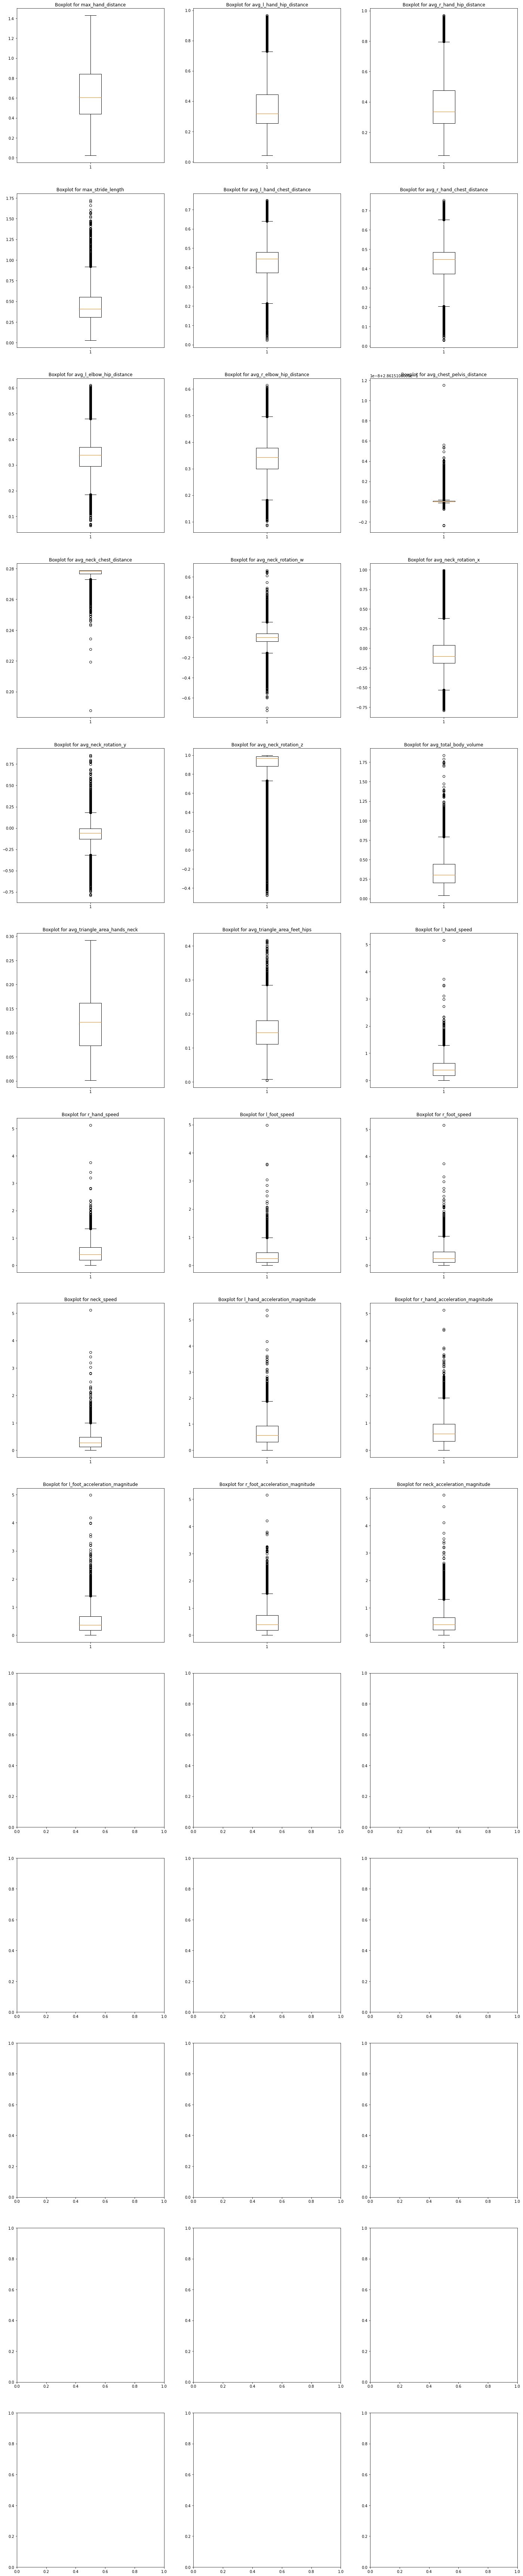

In [146]:
target = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)

numeric_vars = data.columns

rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    
    i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
    
plt.show()

In [147]:
numeric_data = data

transf = StandardScaler(copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
count,1.218500e+04,1.218500e+04,1.218500e+04,1.218500e+04,1.218500e+04,1.218500e+04,1.218500e+04,1.218500e+04,1.218500e+04,1.218500e+04,...,1.218500e+04,1.218500e+04,1.218500e+04,1.218500e+04,1.218500e+04,1.218500e+04,1.218500e+04,1.218500e+04,1.218500e+04,1.218500e+04
mean,2.332516e-18,-9.330065e-18,-8.863561e-17,-7.580678e-17,-2.431648e-16,-2.005964e-16,8.630310e-17,-3.772845e-16,5.933083e-09,2.214724e-15,...,6.531045e-17,6.997548e-18,5.364787e-17,-8.397058e-17,1.166258e-16,-2.612418e-16,-1.049632e-16,-1.189583e-16,4.198529e-17,-7.930555e-17
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,...,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.094584e+00,-2.034276e+00,-2.021967e+00,-2.104883e+00,-3.647249e+00,-3.663780e+00,-3.481798e+00,-3.318208e+00,-4.409364e+00,-2.485831e+01,...,-1.338256e+00,-1.366456e+00,-1.066792e+00,-1.064957e+00,-1.210792e+00,-1.380074e+00,-1.400613e+00,-1.162338e+00,-1.146559e+00,-1.220674e+00
25%,-7.107418e-01,-7.031146e-01,-7.329743e-01,-6.854956e-01,-4.718958e-01,-5.056840e-01,-5.404244e-01,-5.618900e-01,-3.519335e-01,-1.053226e-01,...,-7.823189e-01,-7.842990e-01,-7.278274e-01,-7.342389e-01,-7.597678e-01,-7.437125e-01,-7.471367e-01,-7.303533e-01,-7.292978e-01,-7.160508e-01
50%,-1.686557e-01,-3.027248e-01,-2.815774e-01,-1.916285e-01,1.781732e-01,1.737348e-01,1.293385e-02,-1.173185e-02,-3.202421e-01,4.303505e-01,...,-1.892572e-01,-1.749794e-01,-2.976627e-01,-3.151309e-01,-2.218930e-01,-2.115871e-01,-1.952981e-01,-2.717821e-01,-2.754893e-01,-2.291747e-01
75%,6.062438e-01,4.853005e-01,5.673635e-01,5.447249e-01,4.918589e-01,5.163516e-01,4.028238e-01,4.509457e-01,-2.275413e-01,5.304074e-01,...,5.589813e-01,5.657388e-01,4.196550e-01,4.473014e-01,5.072746e-01,5.262166e-01,5.221393e-01,4.474274e-01,4.675593e-01,4.524506e-01
max,2.550399e+00,3.754612e+00,3.562402e+00,6.417222e+00,2.907683e+00,2.968934e+00,3.467851e+00,3.492315e+00,1.958002e+01,5.640481e-01,...,1.419411e+01,1.373353e+01,1.523094e+01,1.472238e+01,1.721209e+01,9.544977e+00,8.827456e+00,1.087127e+01,1.028783e+01,1.211198e+01


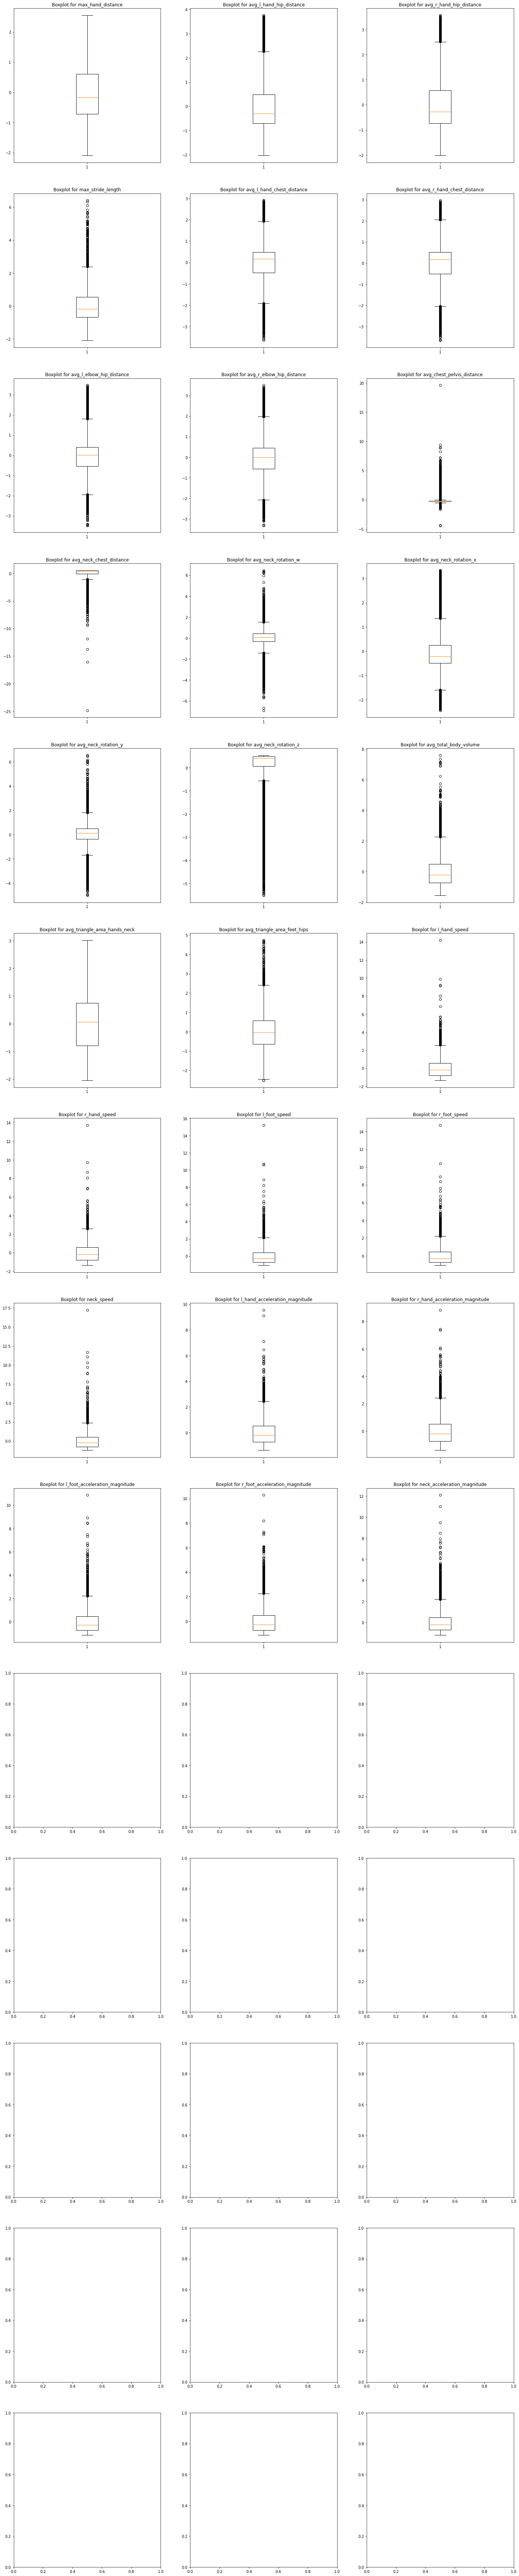

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,-0.572214,-0.621056,-0.901596,0.205803,0.391452,0.224618,0.166336,-0.115864,-0.350199,0.523517,...,0.116242,-0.081981,0.503915,0.038436,0.863520,-0.397903,-0.530566,-0.002589,-0.347397,0.280508
1,-0.517005,-0.236968,-0.416534,0.041693,0.096059,0.109960,-0.056237,-0.128612,-0.297153,0.519352,...,0.639902,0.512871,0.400116,-0.396150,-0.083550,0.643566,0.277775,1.010357,-0.057519,0.985234
2,0.052054,0.580169,0.629246,0.250948,0.275051,-0.102189,0.244439,-0.322096,-0.300249,0.456678,...,1.404134,0.224404,-0.427030,-0.355639,-0.872979,1.789857,0.487164,0.377056,-0.155119,-0.194754
3,0.543850,-0.219285,-0.209366,0.276848,0.605133,0.417284,0.515576,0.185380,-0.387806,0.467458,...,0.491058,0.525641,-0.005377,0.195068,-0.245733,1.645081,0.166354,-0.000400,0.109690,-0.402560
4,1.357024,-0.617193,1.129588,0.345694,0.331189,1.311863,0.183580,1.426354,-0.416035,0.499674,...,-0.660519,-0.060289,-0.662016,-0.708186,-1.051845,0.166997,0.257143,-0.129074,0.001324,-0.444851


In [148]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

In [149]:
#Store MinMaxScaler

minMaxDataFull = minMaxData.join(target, how='right')
minMaxDataFull.to_csv(r'datasets/Fs_B2_S_DANCE_WALK_KIN_1sec.csv', index = False)

joblib.dump(transf, r'datasets/scalers/standardizers/Fs_B2_S_DANCE_WALK_KIN_1sec.pkl') 

['datasets/scalers/standardizers/Fs_B2_S_DANCE_WALK_KIN_1sec.pkl']

In [144]:
data = pd.read_csv('datasets/S_DANCE_WALK_1sec.csv')
scaler = joblib.load(r'datasets/scalers/standardizers/S_DANCE_WALK_1sec.pkl') 

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z,EMOTION_P,EMOTION_A,EMOTION_D
0,1.677978,1.723958,1.810108,-1.351130,1.988116,2.240160,2.068209,2.384510,-0.570530,0.894268,...,-0.020936,-0.014033,-0.004957,-0.020727,-0.008940,0.000028,0.007138,-0.35,0.7,-0.8
1,1.667719,1.731264,1.810170,-1.356127,1.986863,2.238441,2.066691,2.382544,-0.569359,0.871311,...,0.023655,0.016857,0.005290,0.024446,0.014064,0.003031,-0.004083,-0.35,0.7,-0.8
2,1.665165,1.681265,1.770160,-1.356504,1.964656,2.211044,2.041850,2.351234,-0.569345,0.895711,...,-0.009331,-0.036553,0.000895,-0.011298,-0.003159,-0.000946,0.000930,-0.35,0.7,-0.8
3,1.640065,1.635255,1.746457,-1.359037,1.912659,2.196168,1.983675,2.334251,-0.571758,0.900958,...,-0.002209,0.050724,-0.006604,0.002653,-0.006510,0.003144,-0.003202,-0.35,0.7,-0.8
4,1.629835,1.590816,1.725267,-1.363434,1.891238,2.181004,1.959569,2.316889,-0.569259,0.914659,...,-0.007538,-0.053271,0.003371,-0.009822,0.006557,-0.001692,0.009245,-0.35,0.7,-0.8
